# Week 11 - Notes: The Euler-Lagrange Equation

As we will use it, the [Calculus of Variations](https://en.wikipedia.org/wiki/Calculus_of_variations) foucses on finding the conditions of extrema for quantities that can be expressed as an integral. This might be a very abstract concept, so we will start with a simple example.

This approach might seem a bit alien at first, but it turns out to be an interesting way to develop an equivalent formulation of mechanics. Moreover, the Calculus of Variations is a powerful tool in many fields, and forms the basis for [Lagrangian mechanics](https://en.wikipedia.org/wiki/Lagrangian_mechanics).

To do this, we will derive (in 1D) the [Euler-Lagrange equation](https://en.wikipedia.org/wiki/Euler%E2%80%93Lagrange_equation). This equation gives us a way to find the function that makes the integral of a given functional stationary (i.e., a local maximum or minimum).


## Canonical Conceptualization - Finding the Shortest Path in a Plane

Using the Calculus of Variations, we can show that the shortest path between two points in a plane is a straight line. This is a classic example, but it illustrates the concept well. Consider a general path in two-dimensional space that connects two points, say $s_1 = \langle x_1, y_1 \rangle$ and $s_2 = \langle x_2, y_2 \rangle$. We can represent this path as a function $y(x)$. The figure below illustrates the setup.

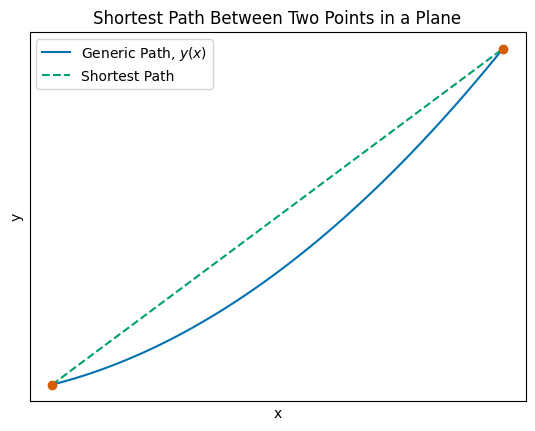

In [18]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-colorblind')

x1, x2 = 1, 5 
xvals = np.linspace(x1, x2, 100)

ygeneric = np.sin((xvals - x1) / (x2 - x1) * np.pi/3) * (3) / 10 + (0 + 3) / 2 + 2*xvals**2
y1, y2 = ygeneric[0], ygeneric[-1]  

fig, ax = plt.subplots()

ax.plot(xvals, ygeneric, label=r'Generic Path, $y(x)$', color='C0')
ax.plot([x1, x2], [y1, y2], label='Shortest Path', color='C1', linestyle='--')
ax.plot(x1, y1, 'C2o')  # Point 1
ax.plot(x2, y2, 'C2o')  # Point 2

# blank ticks
ax.set_xticks([])  # Remove x ticks
ax.set_yticks([])  # Remove y ticks

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Shortest Path Between Two Points in a Plane')
# Add a legend to the plot
ax.legend()
# Show the plot
plt.grid(True)  # Add grid for better readability
plt.show()  # Display the plot

The blue solid line is the 'generic path' that connects the two points $s_1$ and $s_2$. The green dotted line is the solution that we expect to get when we ask, "what is the shortest path between these two points?" 

### Setup of the Problem

Let's take a generic segment of the path $ds$ and express it in terms of its differential elements:

$$ds = \sqrt{dx^2 + dy^2}.$$

The length of the path from $s_1$ to $s_2$ can be expressed as an integral:

$$l = \int_{s_1}^{s_2} ds$$

We want to minimize this length, $l$, which is the total length of the path. To do this, we are attempting to minimize the integral of $ds$ over the path. This is where the Calculus of Variations comes in.

Let's write the expression for $ds$ in a more convenient form. We can factor out the $dx$ term:

$$ds = \sqrt{dx^2 + dy^2} = dx \sqrt{1 + \left(\frac{dy}{dx}\right)^2} = dx = \sqrt{1 + y'(x)^2}$$

where $y'(x) = \frac{dy}{dx}$ is the derivative of $y$ with respect to $x$. So the integral for the length of the path becomes:

$$l = \int_{x_1}^{x_2} dx \sqrt{1 + y'(x)^2}.$$

The function $y(x)$ defines the path that minimizes the length $l$. To find this path, we assume an incorrect function $Y(x)$ that is close to the true path $y(x)$, and we can express the difference between them as $\alpha\eta(x)$:

$$Y(x) = \underbrace{y(x)}_{\textrm{correct}}+ \underbrace{\alpha\eta(x)}_{\textrm{minimize}}$$

Note that $Y(x_1) = y(x_1)$ and $Y(x_2) = y(x_2)$, so the endpoints of the path are fixed. The function $\eta(x)$ represents a small perturbation to the path, and $\alpha$ is a small parameter that we will use to control the size of the perturbation.



### Deriving the Euler-Lagrange Equation

The mathematical derivation involves extremizing the integral using a perturbation approach. The generic integral we are trying to minimize is for a function of the form:

$$f(y(x),y'(x),x)),$$

where $f$ is a function of $y$, its derivative $y'$, and the independent variable $x$. So that the integral we are minimizing can be expressed as:

$$S=\int_{x_1}^{x_2} f(y(x),y'(x),x) dx.$$

We assume $y(x)$ minimizes the integral $S$. So that any function $Y(x) = y(x) + \alpha\eta(x)$ produces a larger value for $S$,

$$\int_{s_1}^{s_2} f(Y(x),Y'(x),x) dx > \int_{s_1}^{s_2} f(y(x),y'(x),x) dx.$$

Because we are looking for a minimum, we notice that when $\alpha = 0$, we have $Y(x) = y(x)$, and the integral is at its minimum. To find the extremum, we can take the derivative of the integral with respect to $\alpha$ and set it to zero:

$$\dfrac{dS}{d\alpha}|_{\alpha=0} = 0.$$

We start that analysis by differentiating the integral with respect to $\alpha$:

$$S = \int_{x_1}^{x_2} f(Y(x),Y'(x),x) dx$$
$$S = \int_{x_1}^{x_2} f(y(x) + \alpha\eta(x), y'(x) + \alpha\eta'(x), x) dx.$$

We can now differentiate.

$$\dfrac{dS}{d\alpha} = \int_{x_1}^{x_2} \left[ \dfrac{\partial f}{\partial Y}\dfrac{dY}{d\alpha} + \dfrac{\partial f}{\partial Y'}\dfrac{dY'}{d\alpha} + \dfrac{\partial f}{\partial x}\dfrac{dx}{d\alpha} \right] dx.$$
$$\dfrac{dS}{d\alpha} = \dfrac{dY'}{d\alpha}+ \dfrac{\partial f}{\partial x}\dfrac{dx}{d\alpha} dx.$$

Let's take each term in turn. The first term is:

$$\dfrac{df}{dY}\dfrac{dY}{d\alpha}.$$

Let's focus on the second part of that term:

$$\dfrac{dY}{d\alpha} = \dfrac{d}{d\alpha}\left[y(x) + \alpha\eta(x)\right] = \eta(x).$$

Let's look at the second term:

$$\dfrac{dY'}{d\alpha}.$$

Again, let's focus on the second part of that term:

$$\dfrac{dY'}{d\alpha} = \dfrac{d}{d\alpha}\left[y'(x) + \alpha\eta'(x)\right] = \eta'(x).$$

Lastly, the third term:

$$\dfrac{\partial f}{\partial x}\dfrac{dx}{d\alpha}=0.$$

This term is a bit different. The $dx$ term is independent of $\alpha$, so we can treat it as a constant with respect to $\alpha$. Therefore, this term will not contribute to the derivative with respect to $\alpha$, and we can ignore it in our analysis.

Putting it all together, we have:

$$\dfrac{dS}{d\alpha} = \int_{x_1}^{x_2}\left[ \dfrac{\partial f}{\partial Y}\eta(x) + \dfrac{\partial f}{\partial Y'}\eta'(x) \right] dx.$$

Our expression is still in terms of $Y(x)$, the incorrect function. We want to express it in terms of $y(x)$, the correct function. Let's look at the derivatives $\dfrac{\partial f}{\partial Y}$ and $\dfrac{\partial f}{\partial Y'}$. We can use the chain rule to express these derivatives in terms of $y(x)$:

$$\dfrac{\partial f}{\partial Y} = \dfrac{\partial f}{\partial y}\dfrac{\partial y}{\partial Y} = \dfrac{\partial f}{\partial y},$$
$$\dfrac{\partial f}{\partial Y'} = \dfrac{\partial f}{\partial y'}\dfrac{\partial y'}{\partial Y'} = \dfrac{\partial f}{\partial y'}.$$

**Why?** Because $\dfrac{\partial y}{\partial Y} = 1$ and $\dfrac{\partial y'}{\partial Y'} = 1$ when we are differentiating with respect to the correct function $y(x)$. This means that we can express the derivatives in terms of the correct function $y(x)$.

$$\dfrac{dS}{d\alpha} = \int_{x_1}^{x_2}\left[ \dfrac{\partial f}{\partial y}\eta(x) + \dfrac{\partial f}{\partial y'}\eta'(x) \right] dx.$$

We are seeking $\dfrac{dS}{d\alpha}$ at $\alpha = 0$, so we set the integral to zero:

$$\int_{x_1}^{x_2}\left[ \dfrac{\partial f}{\partial y}\eta(x) + \dfrac{\partial f}{\partial y'}\eta'(x) \right] dx = 0.$$

#### Integration by Parts

Now to deal with the integral here, we can use integration by parts:

$$\int u'v dx = [uv] - \int u v' dx$$

The first term $[uv]$ is called the "surface term" because it is the result of the integral and is evaluated at the boundaries of the integral, $x_1$ and $x_2$. We will apply integration by parts only to the second term in the integral.

Here, we note $u = \eta(x)$ and $v = \dfrac{\partial f}{\partial y'}$. Then, we can express the second term in the integral as follows:

$$\int_{x_1}^{x_2} \eta'(x) \dfrac{\partial f}{\partial y'} dx = \underbrace{\left[ \eta(x) \dfrac{\partial f}{\partial y'} \right]_{x_1}^{x_2}}_{\eta(x_1)=\eta(x_2)=0} - \int_{x_1}^{x_2} \eta(x) \dfrac{d}{dx}\left( \dfrac{\partial f}{\partial y'} \right) dx$$
$$\int_{x_1}^{x_2} \eta'(x) \dfrac{\partial f}{\partial y'} dx = - \int_{x_1}^{x_2} \eta(x) \dfrac{d}{dx}\left( \dfrac{\partial f}{\partial y'} \right) dx$$

Notice that the surface term evaluates to zero because we have fixed the endpoints of the path, so $\eta(x_1) = \eta(x_2) = 0$.  We put this all together to get:

$$\dfrac{dS}{d\alpha} = \int_{x_1}^{x_2}\left[ \eta(x)\dfrac{\partial f}{\partial y} - \eta(x) \dfrac{d}{dx}\left( \dfrac{\partial f}{\partial y'} \right) \right] dx = 0.$$
$$\dfrac{dS}{d\alpha} = \int_{x_1}^{x_2} \eta(x) \left[ \dfrac{\partial f}{\partial y} - \dfrac{d}{dx}\left( \dfrac{\partial f}{\partial y'} \right) \right] dx = 0.$$

```{important}
The last statement is true for any arbitrary function $\eta(x)$, so we can conclude that the term in square brackets must be zero:

$$\dfrac{\partial f}{\partial y} - \dfrac{d}{dx}\left( \dfrac{\partial f}{\partial y'} \right) = 0.$$

This is the **[Euler-Lagrange equation](https://en.wikipedia.org/wiki/Euler%E2%80%93Lagrange_equation)** for a 1D problem.
```

### Back to the Shortest Path Example

Now let's apply the Euler-Lagrange equation to our original problem of finding the shortest path between two points in a plane. We have:

$$l = \int_{x_1}^{x_2} \sqrt{1 + y'(x)^2} dx.$$

Here, we can identify our function $f$ as:

$$f(y(x), y'(x), x) = \sqrt{1 + y'(x)^2}.$$

Let's apply the Euler-Lagrange equation to this function. 

$$\dfrac{\partial f}{\partial y} - \dfrac{d}{dx}\left( \dfrac{\partial f}{\partial y'} \right) = 0.$$

We take the derivatives:

$$\dfrac{\partial f}{\partial y} = 0$$

since $f$ does not depend on $y$, only on $y'$. Now let's compute the second term:

$$\dfrac{\partial f}{\partial y'} = \dfrac{\partial}{\partial y'}\left( \sqrt{1 + y'(x)^2} \right)$$
$$\dfrac{\partial f}{\partial y'} = \dfrac{1}{2} \left(1 + y'(x)^2\right)^{-1/2} 2y'(x)$$
$$\dfrac{\partial f}{\partial y'} = \frac{y'(x)}{\sqrt{1 + y'(x)^2}}.$$

Let's put all this together:

$$0 = \dfrac{\partial f}{\partial y} - \dfrac{d}{dx}\left( \dfrac{\partial f}{\partial y'} \right)$$
$$0 = 0 - \dfrac{d}{dx}\left(\frac{y'(x)}{\sqrt{1 + y'(x)^2}}\right).$$

This means that,

$$\dfrac{d}{dx}\left(\frac{y'(x)}{\sqrt{1 + y'(x)^2}}\right) = 0$$

This implies that:

$$\frac{y'(x)}{\sqrt{1 + y'(x)^2}} = C = \textrm{a constant}.$$

Or rearranging gives us:


$$y'(x) = C\sqrt{1 + y'(x)^2}$$
$$y'(x)^2 = C^2(1 + y'(x)^2)$$
$$(1 - C^2)y'(x)^2 = C^2$$
$$y'(x)^2 = \frac{C^2}{1 - C^2}$$
$$y'(x) = \pm \sqrt{\frac{C^2}{1 - C^2}}$$


So that, $y'(x)$ is a constant, call it $m$, which produces a linear solution.

$$\dfrac{dy}{dx} = \sqrt{\frac{C^2}{1 - C^2}} = m$$

Integrating gives us:

$$y(x) = mx + b$$

where $b$ is a constant of integration. This is the equation of a straight line!

## Example: Snell's Law

Let's assume you are walking on the beach and need to get to a location in the water quickly. Where do you enter the water to minimize the time it takes to reach the location in the water? This is a classic problem in physics and can be solved using the Calculus of Variations.

Consider the picture below where you can move at a speed $v_1$ on the shore and a speed $v_2$ in the water. We know that $v_1 > v_2$, so you can move faster on the shore than in the water. We aim to minimize the time it takes to reach the point $\langle x_2, y_2 \rangle$ in the water from point $\langle x_1, y_1 \rangle$ on the shore. We take the shoreline to be a line at $x = 0$. and the location we cross the shoreline is $\langle 0, y \rangle$.

![Snell's Law Diagram](../images/notes/week11/snells_shore.png)

Notice the angle that we approach the shoreline at, $\theta_1$, and the angle that we approach the target in the water, $\theta_2$.

The total time to travel from $\langle x_1, y_1 \rangle$ to $\langle 0, y \rangle$ and then to $\langle x_2, y_2 \rangle$ is:

$$T = t_1 + t_2 = \dfrac{d_1}{v_1} + \dfrac{d_2}{v_2}$$

where $d_1$ is the distance from $\langle x_1, y_1 \rangle$ to $\langle 0, y \rangle$, and $d_2$ is the distance from $\langle 0, y \rangle$ to $\langle x_2, y_2 \rangle$. We can write those distances in terms of the coordinates:

$$d_1 = \sqrt{x_1^2 + (y - y_1)^2}$$
$$d_2 = \sqrt{x_2^2 + (y_2 - y)^2}$$

This gives us:

$$T = \dfrac{\sqrt{x_1^2 + (y - y_1)^2}}{v_1} + \dfrac{\sqrt{x_2^2 + (y_2 - y)^2}}{v_2}.$$

We want to minimize this time, $T$, by choosing the optimal point $y$ where we cross the shoreline. We compute the derivative of $T$ with respect to $y$ and set it to zero:

$$\dfrac{dT}{dy} = 0$$


$$\dfrac{dT}{dy} = \dfrac{1}{2}\dfrac{1}{v_1}\left(x_1^2 + (y-y_1)^2\right)^{-1/2}(2)(y-y_1) + \dfrac{1}{2}\dfrac{1}{v_2}\left(x_2^2 + (y_2-y)^2\right)^{-1/2}(-2)(y_2-y) = 0$$
$$\dfrac{dT}{dy} = \dfrac{1}{v_1}\left(\dfrac{y-y_1}{\sqrt{x_1^2 + (y-y_1)^2}}\right) - \dfrac{1}{v_2}\left(\dfrac{y_2-y}{\sqrt{x_2^2 + (y_2-y)^2}}\right) = 0$$
$$\dfrac{dT}{dy} = \dfrac{1}{v_1}\left(\dfrac{y-y_1}{d_1}\right) - \dfrac{1}{v_2}\left(\dfrac{y_2-y}{d_2}\right) = 0$$

where the last step is just substituting in the expressions for $d_1$ and $d_2$. Notice that those expressions are related to the angles we defined earlier. We can rewrite the expression in terms of the angles $\theta_1$ and $\theta_2$:

$$\sin(\theta_1) = \frac{y - y_1}{d_1}$$
$$\sin(\theta_2) = \frac{y_2 - y}{d_2}$$

This gives us:

$$\dfrac{\sin(\theta_1)}{v_1} - \dfrac{\sin(\theta_2)}{v_2} = 0$$

```{important}
This is [**Snell's Law**](https://en.wikipedia.org/wiki/Snell%27s_law)! It tells us that the ratio of the sine of the angles to the velocities is constant. This is a classic result in optics, but it also applies to this problem of finding the shortest path in a plane.

$$\dfrac{\sin(\theta_1)}{v_1} = \dfrac{\sin(\theta_2)}{v_2}$$
```

## Example: Brachistochrone Problem

The [Brachistochrone problem](https://en.wikipedia.org/wiki/Brachistochrone_problem) is a classic problem in the Calculus of Variations. It asks the question: "What is the shape of the curve that a bead will follow under the influence of gravity to reach the bottom in the shortest time?"  Here's a great video from [Steven Strogatz](https://en.wikipedia.org/wiki/Steven_Strogatz) that explains the problem and its solution.

[![Youtube Video on the Brachistochrone Problem](../images/notes/week11/Cld0p3a43fU.jpg)](https://www.youtube.com/watch?v=Cld0p3a43fU)

Source: <https://www.youtube.com/watch?v=Cld0p3a43fU>

The setup is below, there's two points separated by a distance vertically and horizontally. What shape should we make a track so that a bead will roll down it in the shortest time?

![The Brachistochrone Problem](../images/notes/week11/brachistochrone.png)

The time it takes for the bead to roll down the curve is given by:

$$T = \int_{1}^{2} \dfrac{ds}{v}$$

where $ds$ is the differential arc length along the curve, and $v$ is the velocity of the bead at that point. The generic step is the same as before:

$$ds = \sqrt{dx^2 + dy^2}.$$

#### Velocity of the Bead

What about $v$? Because the bead is moving under the influence of gravity, we can use conservation of energy to find the velocity. Note that we don't model the rolling of the bead, just the motion down the track. We also neglect all frictional forces. This is a major simplification, but it will give us an analytical solution.

$$\Delta K + \Delta U = 0$$

If the bead starts from rest, then $v_i = 0$, and we can write:

$$\dfrac{1}{2}mv^2 - \dfrac{1}{2}m(0)^2 + mg(\Delta y) = 0,$$

$$v = \sqrt{2g\Delta y}$$

where $\Delta y = y_1 - y_2 > 0$. This is the change in height of the bead as it rolls down the track. We can express this in terms of the coordinates of the two points, $y_1$ and $y_2$.

Let's move the origin to the top of the track and measure $+y$ downwards. Thus, for any point on the track, we have:

$$v = \sqrt{2gy}.$$

We can now write the integral again,

$$T = \int_{1}^{2} \dfrac{ds}{v} = \int_{1}^{2} \dfrac{\sqrt{dx^2 + dy^2}}{\sqrt{2gy}}.$$

We notice that we can factor out a $dy$ term from the square root in the numerator:

$$\sqrt{dx^2 + dy^2} = dy\sqrt{\left(\frac{dx}{dy}\right)^2 + 1} = dy \sqrt{x'^2 + 1}$$

where $x' = \frac{dx}{dy}$. This gives us:

$$T = \dfrac{1}{\sqrt{2g}}\int_{0}^{y_2} dy \dfrac{\sqrt{x'^2 + 1}}{\sqrt{y}}.$$

We can identify our function $f$ as:

$$f(x,x',y) = f(x',y) = \dfrac{\sqrt{x'^2 + 1}}{\sqrt{y}}.$$

Because $f$ does not depend on $x$, $\partial f/\partial x = 0$. So that the Euler-Lagrange equation simplifies to:

$$\dfrac{d}{dy}\left(\dfrac{\partial f}{\partial x'}\right) = 0.$$

Or that this partial derivative must be a constant:

$$\dfrac{\partial f}{\partial x'} = \textrm{a constant},$$

$$\dfrac{\partial f}{\partial x'} = \dfrac{x'}{\sqrt{x'^2 + 1}\sqrt{y}} = \sqrt{C},$$

where $C$ is a constant. We square both sides to get:

$$\dfrac{x'^2}{(x'^2 + 1)y} = C.$$

Knowing the solution ahead of time, we choose the constant $C = \frac{1}{2a}$. This gives us:

$$\dfrac{x'^2}{(x'^2 + 1)y} = \frac{1}{2a}.$$

Some more algebra gives us:

$$2ax'^2 = y(x'^2 + 1),$$
$$(2a - y)x'^2 = y,$$
$$x'^2 = \frac{y}{2a - y},$$

where $x' = \frac{dx}{dy}$. We can now integrate this to find the shape of the curve:

$$x = \int \sqrt{\frac{y}{2a - y}} dy.$$

This integral will give us the shape of the curve $x(y)$, but to solve it we need to use a substitution. 

Let $y = a(1 - \cos(\theta))$. Thus, $dy = a\sin(\theta)d\theta$. This gives us:

$$x(y(\theta)) = \int \sqrt{\frac{y(\theta)}{2a - y(\theta)}} dy$$
$$x(y(\theta)) = \int \sqrt{\frac{a(1 - \cos(\theta))}{2a - a(1 - \cos(\theta))}} a\sin(\theta)d\theta$$
$$x(y(\theta)) = a \int \sqrt{\frac{(1-\cos\theta)}{(1+\cos\theta)}} \sin(\theta)d\theta.$$

Note that $\sin \theta = \sqrt{1 - \cos^2 \theta} = \sqrt{(1 - \cos\theta)(1 + \cos\theta)}$. This allows us to simplify the integral:

$$x(y(\theta)) = a \int \sqrt{\frac{(1-\cos\theta)^2(1+\cos\theta)}{(1+\cos\theta)}} d\theta$$
$$x(y(\theta)) = a \int \sqrt{(1 - \cos\theta)^2} d\theta$$
$$x(y(\theta)) = a \int (1 - \cos\theta) d\theta$$
$$x(y(\theta)) = a \left(\theta - \sin(\theta)\right) + C$$

where $C$ is a constant of integration. 

With initial conditions $x(0) = 0$ when $y(0) = 0$ at $t=0$ and $\theta = 0$, we find that $C = 0$. So the solution is:

$$x(\theta) = a\left(\theta - \sin(\theta)\right)$$
$$y(\theta) = a(1 - \cos(\theta)).$$

This is the "cycloid" curve that the bead will follow to minimize the time it takes to roll down the track. We can plot this curve to visualize it.

What is so interesting about this curve is that it is [isochronous](https://en.wikipedia.org/wiki/Isochronous), meaning that all beads released from rest at any point on the curve will reach the bottom at the same time, regardless of where they start.

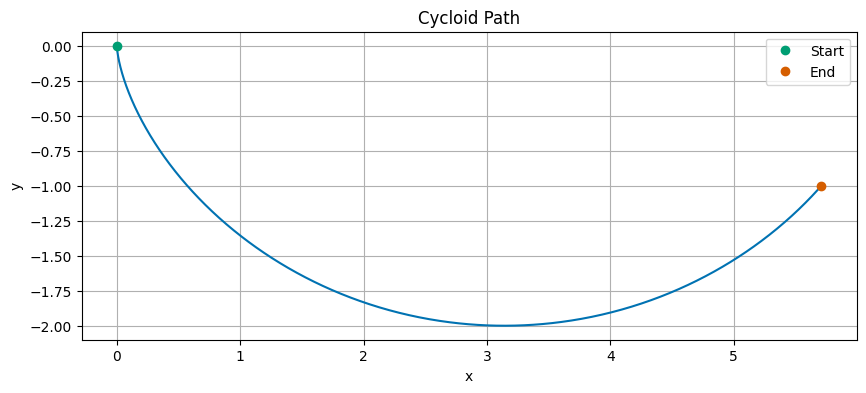

In [27]:
## Plot a cycloid path for comparison
## $$x(\theta) = a\left(\theta - \sin(\theta)\right)$$
## $$y(\theta) = a(1 - \cos(\theta)).$$

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-colorblind')

# Cycloid parameters
a = 1  # Radius of the rolling circle
theta = np.linspace(0, 3/2 * np.pi, 1000)  # Parameter for the cycloid

# Cycloid equations
x_cycloid = a * (theta - np.sin(theta))
y_cycloid = -a * (1 - np.cos(theta))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 4))  # Create a new figure and axis
ax.plot(x_cycloid, y_cycloid, color='C0')
ax.plot(0, 0, 'C1o', label='Start')  # Starting point of the cycloid
ax.plot(x_cycloid[-1], y_cycloid[-1], 'C2o', label='End')  # Ending point of the cycloid

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Cycloid Path')

ax.legend()  # Add a legend to the plot

# Show the plot
plt.grid(True)  # Add grid for better readability
plt.show()  # Display the plot